# Introduction

* This notebook aims to use a simple LTSpice simulation of a series RLC circuit;
* The input voltage signals are generated using numpy;
* The PyLTSpice package is used to control and process the data from the simulation.

## Generating base signals 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from quantiphy import Quantity #to format numbers 

**Generating the sinc function in time domain**
* Given a bandwidth and a sampling rate, create a sinc pulse  $p(t)$ in the time domain;
* This pulse will be used to modulate a data given a certain modulation scheme.

The equation of the sinc function is:

$p(t) = \dfrac{B}{2\pi} sinc \left ( \dfrac{Bt}{2} \right )$

Where:
- B is the bandwidth in Hz;
- $sinc$ in numpy refers to $sinc(t) = \frac{\sin(\pi t) }{ \pi t}$

In the frequecy domain, the sinc signal $p(t)$ transforms into as a rectangular spectrum, defined by the following equation:

$\chi \{ p(t) \} = rect \left ( \dfrac{\omega}{B} \right ) $

Where:
* $\chi \{ \}$ stands for the Fourier Transform operation;
* $rect$ stands for the rectangular pulse function.

The $rect$ function is described by the following expression:

$rect \left ( \dfrac{\omega}{B}\right ) =  \begin{cases}1 & -B/2 \geq \omega \geq B/2 \\
0 & \mathrm{otherwise} \\
\end{cases}$



In [3]:
#initial parameters
t_init = 0
t_end = 1e-3
numPoints = 100 #points per pulse
t_step = t_end/numPoints #time step
f_sampling = 1/t_step #equivalent sampling frequency

#time vector
time = np.linspace(t_init,t_end,numPoints)

print("Time step:")
print(Quantity(t_step,'s'))
print("Sampling Frequency: ")
print(Quantity(f_sampling,'Hz'))
print("Length of time vector:")
print(time.size)

Time step:
10 us
Sampling Frequency: 
100 kHz
Length of time vector:
100


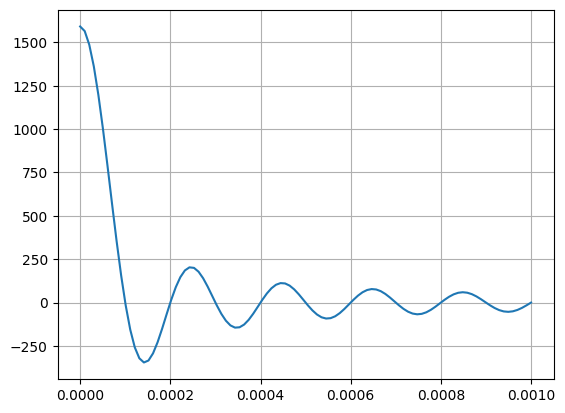

In [4]:
Bw_Hz = 10e3 #bandwidth of signal in Hz 

vsinc = Bw_Hz/(2*np.pi)*(np.sinc(Bw_Hz*time))

plt.plot(time,vsinc)
plt.grid()